## Import all needed modules

In [1]:
from image import loadImage, loadImages, plotShapes, plotData, Mask
from CapSol import Laplace, Hooke
from folder import Folder
import matplotlib.pyplot as plt
import numpy as np

### Load numbered images from a folder and apply a filter for .jpg files

In [2]:
folder = Folder("exampleData/Drenckhan/02/")
folder.filterFiles("*.jpg")

### Setting up a mask for the first image to get a proper detection  (optional)

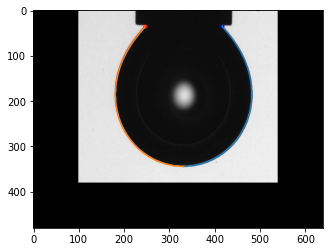

In [3]:
mask = Mask(100, 100, 0, 100)
shape = loadImage(folder.files[0], flip=True, mask=mask, verbose=True, samples=1000)

In [4]:
# The images are loaded into shape vectors consisting
# of #samples * (r, z)-pairs per shape
# Each image provides two shapes (left and right half of the drop)
shapes = loadImages(folder.files, flip=True, mask=mask)

### Fit shapes via numerical Hooke shape fitting

In [5]:
# Here the reference image is specified and the image from which the
# hooke fit will start, this is individual for every shape sequence and
# must be evaluated manually.
referenceShape = 0
firstFit, lastFit = 10, 25
laplaceFit = Laplace(shapes[referenceShape])

In [6]:
# Should take roughly 15-20 seconds to do the 15 shape fits.
hookeFits = [Hooke(shape,
                   laplaceFit.p_L,
                   laplaceFit.rho ) for shape in shapes[firstFit:lastFit]]   

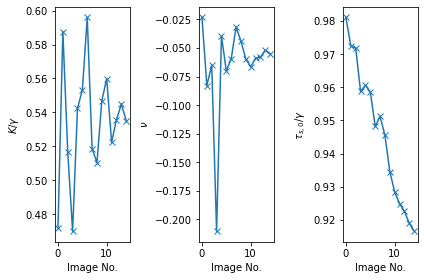

In [7]:
# Plot the results of the fit
K, nu, tau_s_0 = np.array([[fit.K, fit.nu, fit.tau_s_0] for fit in hookeFits]).T

fig, ax = plt.subplots(1,3)
plotData(ax[0], y=K, xlabel="Image No.", ylabel=r"$K / \gamma$")
plotData(ax[1], y=nu, xlabel="Image No.", ylabel=r"$\nu$")
plotData(ax[2], y=tau_s_0, xlabel="Image No.", ylabel=r"$\tau_{s, 0} / \gamma$")
plt.tight_layout()

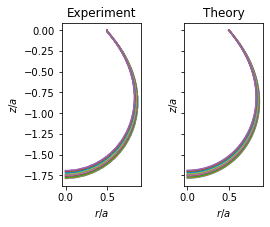

In [8]:
# Generating and plotting the fitted shapes from theory
fittedShapes = [fit.shape for fit in hookeFits]

fig, ax = plt.subplots(1,2,figsize=(4,3), sharey=True)
ax[0].set_title("Experiment")
ax[1].set_title("Theory")
plotShapes(ax[0], shapes[firstFit:lastFit])
plotShapes(ax[1], fittedShapes)